In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread("canvas-181-pothole.png")

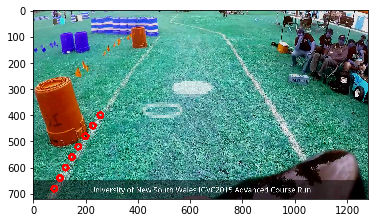

In [3]:
plt.imshow(image)

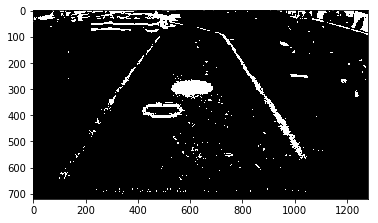

In [5]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,190], dtype=np.uint8)
upper_white = np.array([180, 100, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower_white, upper_white)
mask = cv2.medianBlur(mask,5)
plt.imshow(mask,cmap='gray')

571 288 42.7 4724
640 344 23.9 2079
645 278 46.3 4183
507 381 33.3 2603


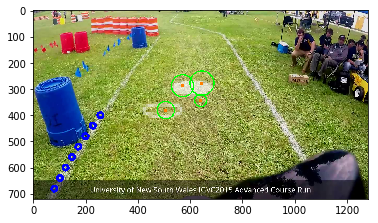

In [180]:
output = image.copy()
circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 1, 50,param1=70,param2=30,minRadius=10,maxRadius=300)
def filterByPixel(image,x,y):
    v = 40
    h = 50
    t = 100
    patch = image[y-v:y+v,x-h:x+h]
    count = np.count_nonzero(patch)
#     print (patch.shape)
    return count 
for [x, y, r] in circles[0]:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    x=int(x)
    y = int(y)
    if r > 100 or r < 10:
        continue
    v = filterByPixel(mask,x,y)
    if  v < 2000:
        continue
    print (x,y,r,v)
    cv2.circle(output, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
#     cv2.rectangle(output, (x - 50, y - 40), (x + 50, y + 40), (200, 128, 150), -1)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

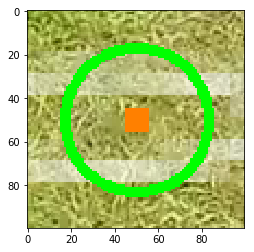

In [178]:
v = 50
h = 50
t = 100

plt.imshow(cv2.cvtColor(output[381 -v:381 +v,507 -h:507 +h,:], cv2.COLOR_BGR2RGB))